# <font color='e6005c'>SIMPLE LINEAR REGRESSION:DELIVERY TIME DATA   

## <font color='e6005c'> problem Statement

## <font color='1a1aff'> Delivery_time -> Predict delivery time using sorting time 

In [1]:
#import required libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as smf
import statsmodels.formula.api as sm

import scipy.stats as stats

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv file
delivery_time= pd.read_csv('delivery_time.csv')
delivery_time

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
#Checking for null values 
#Checking for data types
#Checking for shape of Delivery time dataset
#Checking for column names
#all in one function (info())
delivery_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
delivery_time.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
##checking for null vlaues

delivery_time.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [6]:
# checking for the duplicate values
delivery_time[delivery_time.duplicated(keep=False)]

,Delivery Time,Sorting Time


In [7]:
#Renaming the columns because of white space

delivery_time = delivery_time.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'},axis=1)
delivery_time.head(10)

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


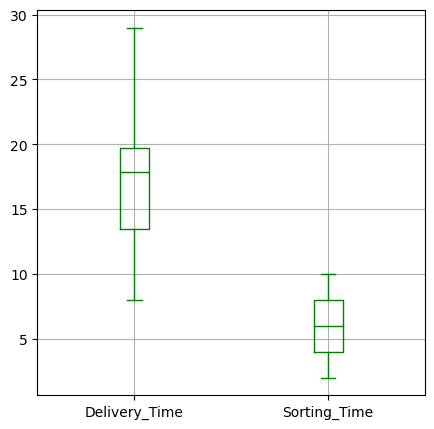

In [8]:
#Checking for outliers in the data with the help of visualization_boxplot

plt.figure(figsize = (5,5))
delivery_time.boxplot(column=['Delivery_Time','Sorting_Time'],color='g')
plt.show()

### there is no outliers in data

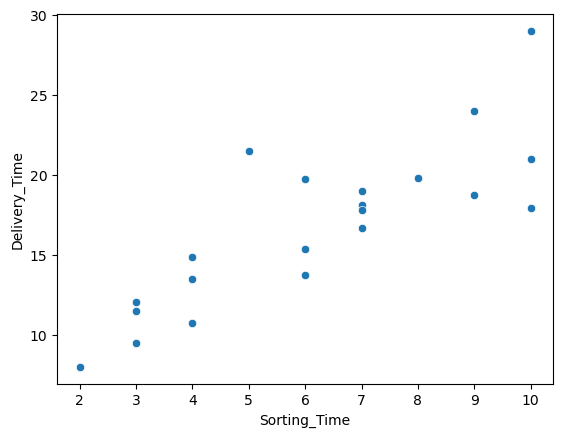

In [9]:
sns.scatterplot(x=delivery_time['Sorting_Time'],y=delivery_time['Delivery_Time'])
plt.show()

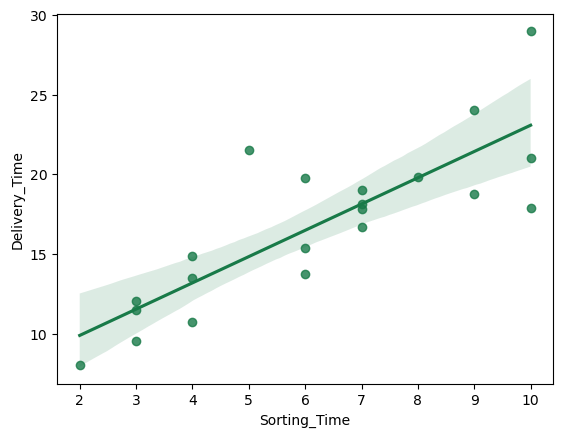

In [10]:
sns.regplot(x=delivery_time['Sorting_Time'],y=delivery_time['Delivery_Time'],color='#187a48')
plt.show()

In [11]:
delivery_time.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


## <font color='e6005c'>As you can see above 
+ There is good correlation between the two variable.
+ The score is more than 0.8 which is a good sign

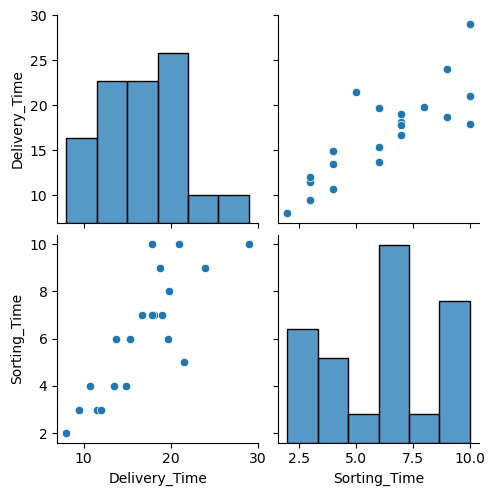

In [12]:
sns.pairplot(delivery_time)
plt.show()

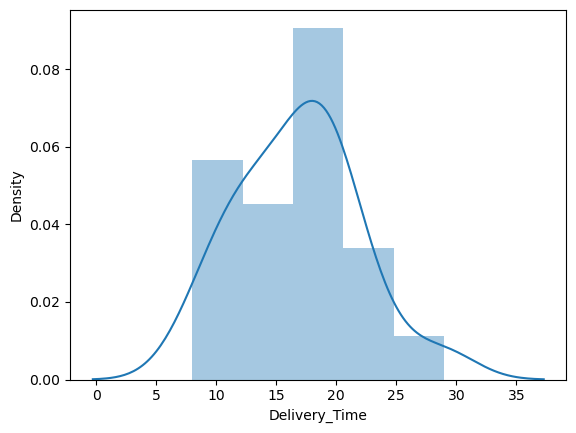

In [13]:
# Cheking if the data is normally ditributed, using distplot
sns.distplot(delivery_time['Delivery_Time'])
plt.show()

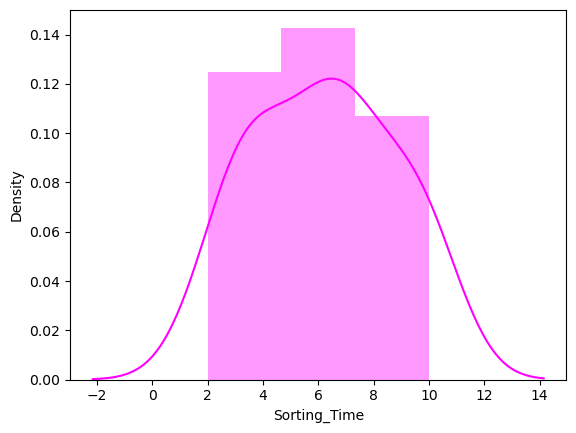

In [14]:
sns.distplot(delivery_time['Sorting_Time'],color='magenta')
plt.show()

## Model1-construct a model without applying any transformation - Linear model

In [15]:
model1 = sm.ols('Delivery_Time~Sorting_Time', data = delivery_time).fit()

In [16]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 07 Jul 2023   Prob (F-statistic):           3.98e-06
Time:                        16:05:37   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
#coefficients
model1.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [18]:
#T & P-values
print(model1.tvalues, '\n', model1.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [19]:
#R-squared and Adj R-squared values
(model1.rsquared,model1.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [20]:
actual = delivery_time.Delivery_Time

In [21]:
pred1 = model1.predict(delivery_time.Sorting_Time)

In [22]:
rmse1 = np.sqrt(mean_squared_error(actual, pred1))
rmse1

2.7916503270617654

## Model2- Constructing a new model by applying a Log Transformation on the independent variables

In [23]:
model2 = sm.ols('Delivery_Time~np.log(Sorting_Time)', data = delivery_time).fit()

In [24]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Fri, 07 Jul 2023   Prob (F-statistic):           2.64e-06
Time:                        16:05:37   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_Time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
model2.params

Intercept               1.159684
np.log(Sorting_Time)    9.043413
dtype: float64

In [26]:
#T & P-values
print(model2.tvalues, '\n', model2.pvalues)

Intercept               0.472460
np.log(Sorting_Time)    6.586789
dtype: float64 
 Intercept               0.641980
np.log(Sorting_Time)    0.000003
dtype: float64


In [27]:
#R-squared and Adj R-squared values
(model2.rsquared,model2.rsquared_adj)

(0.6954434611324223, 0.6794141696130761)

In [28]:
pred2 = model2.predict(delivery_time.Sorting_Time)

In [29]:
rmse2 = np.sqrt(mean_squared_error(actual, pred2))
rmse2

2.733171476682066

## Model3- Construct a new model, by applying a Squareroot transformation

In [30]:
model3 = sm.ols('Delivery_Time~np.sqrt(Sorting_Time)', data = delivery_time).fit()

In [31]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Fri, 07 Jul 2023   Prob (F-statistic):           2.61e-06
Time:                        16:05:37   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(Sorting_Time)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
#Coefficents
model3.params

Intercept               -2.518837
np.sqrt(Sorting_Time)    7.936591
dtype: float64

In [33]:
print(model3.tvalues, '\n', model3.pvalues)

Intercept               -0.840911
np.sqrt(Sorting_Time)    6.592434
dtype: float64 
 Intercept                0.410857
np.sqrt(Sorting_Time)    0.000003
dtype: float64


In [34]:
#R-squared and Adj R-squared values
(model3.rsquared,model3.rsquared_adj)

(0.6958062276308671, 0.6797960290851233)

In [35]:
pred3 = (model3.predict(delivery_time.Sorting_Time))

In [36]:
rmse3 = np.sqrt(mean_squared_error(actual, pred3))
rmse3

2.7315432100912105

## Model4-Constructing a new model, by applying Exponential transformation

In [37]:
model4 = sm.ols('Delivery_Time~np.exp(Sorting_Time)', data = delivery_time).fit()

In [38]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     10.74
Date:                Fri, 07 Jul 2023   Prob (F-statistic):            0.00396
Time:                        16:05:38   Log-Likelihood:                -58.691
No. Observations:                  21   AIC:                             121.4
Df Residuals:                      19   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               15.0836      1.047     14.406      0.000      12.892      17.275
np.exp(Sorting_Time)     0.0004      0.000      3.277      0.004       0.000       0.001
==============================================================================
Omnibus:                        2.426   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                1.151
Skew:                          -0.087   Prob(JB):                        0.562
Kurtosis:                       1.866   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
model4.params

Intercept               15.083578
np.exp(Sorting_Time)     0.000393
dtype: float64

In [40]:
print(model4.tvalues, '\n', model4.pvalues)

Intercept               14.406456
np.exp(Sorting_Time)     3.277108
dtype: float64 
 Intercept               1.117304e-11
np.exp(Sorting_Time)    3.964511e-03
dtype: float64


In [41]:
#R-squared and Adj R-squared values
(model4.rsquared,model4.rsquared_adj)

(0.361117702270909, 0.3274923181799042)

In [42]:
pred4 = (model4.predict(delivery_time.Sorting_Time))

In [43]:
rmse4=np.sqrt(mean_squared_error(actual, pred4))
rmse4

3.958615702523664

## Model5- Applying logorithm transformation in other way and predict a new model

In [44]:
model5 = sm.ols('np.log(Delivery_Time)~Sorting_Time', data = delivery_time).fit()

In [45]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Fri, 07 Jul 2023   Prob (F-statistic):           1.59e-06
Time:                           16:05:38   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_Time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
#Coefficents
model5.params

Intercept       2.121372
Sorting_Time    0.105552
dtype: float64

In [47]:
print(model5.tvalues,'\n',model5.pvalues)

Intercept       20.601357
Sorting_Time     6.836088
dtype: float64 
 Intercept       1.857343e-14
Sorting_Time    1.592708e-06
dtype: float64


In [48]:
#R-squared and Adj R-squared values
(model5.rsquared,model5.rsquared_adj)

(0.7109478980584187, 0.6957346295351776)

In [49]:
pred5 = np.exp(model5.predict(delivery_time.Sorting_Time))

In [50]:
rmse5 = np.sqrt(mean_squared_error(actual, pred5))
rmse5

2.940250323056201

## Model6-creating a new model with quadratic equation

In [51]:
delivery_time1=delivery_time.copy()
delivery_time1["st_sqr"]=delivery_time.Sorting_Time*delivery_time.Sorting_Time
delivery_time1.head(2)

,Delivery_Time,Sorting_Time,st_sqr
0,21.0,10,100
1,13.5,4,16


In [52]:
model6=sm.ols('Delivery_Time~Sorting_Time+st_sqr',data=delivery_time1).fit()

In [53]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     20.36
Date:                Fri, 07 Jul 2023   Prob (F-statistic):           2.39e-05
Time:                        16:05:38   Log-Likelihood:                -50.981
No. Observations:                  21   AIC:                             108.0
Df Residuals:                      18   BIC:                             111.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.5222      4.160      0.847      0.408      -5.217      12.261
Sorting_Time     2.8130      1.461      1.926      0.070      -0.256       5.882
st_sqr          -0.0932      0.115     -0.810      0.429      -0.335       0.149
==============================================================================
Omnibus:                        5.388   Durbin-Watson:                   1.345
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                3.393
Skew:                           0.943   Prob(JB):                        0.183
Kurtosis:                       3.563   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
model6.params

Intercept       3.522234
Sorting_Time    2.813002
st_sqr         -0.093198
dtype: float64

In [55]:
print(model6.tvalues,'\n',model6.pvalues)

Intercept       0.846756
Sorting_Time    1.925632
st_sqr         -0.809783
dtype: float64 
 Intercept       0.408248
Sorting_Time    0.070097
st_sqr          0.428641
dtype: float64


In [56]:
#R-squared and Adj R-squared values
(model6.rsquared,model6.rsquared_adj)

(0.6934396274520247, 0.659377363835583)

In [57]:
pred6=model6.predict(delivery_time1)

In [58]:
rmse6 = np.sqrt(mean_squared_error(actual, pred6))
rmse6

2.7421482037801215

In [59]:
con={"Model":pd.Series(["Model1","Model2","Model3","Model4","Model5","Model6"]),
     "Rsquared":(model1.rsquared,model2.rsquared,model3.rsquared,model4.rsquared,model5.rsquared,model6.rsquared),
     "Adj_Rsquared":(model1.rsquared_adj,model2.rsquared_adj,model3.rsquared_adj,model4.rsquared_adj,model5.rsquared_adj,model6.rsquared_adj),
     "RMSE":(rmse1,rmse2,rmse3,rmse4,rmse5,rmse6)
    }
con=pd.DataFrame(con)
con

,Model,Rsquared,Adj_Rsquared,RMSE
0,Model1,0.682271,0.665549,2.791650
1,Model2,0.695443,0.679414,2.733171
2,Model3,0.695806,0.679796,2.731543
3,Model4,0.361118,0.327492,3.958616
4,Model5,0.710948,0.695735,2.940250
5,Model6,0.693440,0.659377,2.742148


# Conclusion

## Comparison between all models , model3 has R-squared value of. 0.6958.And we know higher R-squared value and a lower RMSE value maked a better model.Hence model4 is better model to predict delivery_time

In [60]:
predicted = pd.DataFrame()
predicted['Sorting_Time'] = delivery_time.Sorting_Time
predicted['Delivery_Time'] = delivery_time.Delivery_Time
predicted['Pred_model1_DT'] = pd.DataFrame(pred1)
predicted['Pred_model2_DT'] = pd.DataFrame(pred2)
predicted['Pred_model3_DT'] = pd.DataFrame(pred3)
predicted['Pred_model4_DT'] = pd.DataFrame(pred4)
predicted['Pred_model5_DT'] = pd.DataFrame(pred5)
predicted['Pred_model6_DT'] = pd.DataFrame(pred6)

predicted

,Sorting_Time,Delivery_Time,Pred_model1_DT,Pred_model2_DT,Pred_model3_DT,Pred_model4_DT,Pred_model5_DT,Pred_model6_DT
0,10,21.00,23.072933,21.982913,22.578867,23.739082,23.972032,22.332430
1,4,13.50,13.178814,13.696517,13.354345,15.105033,12.725123,13.283069
2,6,19.75,16.476853,17.363305,16.921761,15.242109,15.716034,17.045108
3,9,24.00,21.423913,21.030094,21.290936,18.267760,21.570707,21.290194
4,10,29.00,23.072933,21.982913,22.578867,23.739082,23.972032,22.332430
5,6,15.35,16.476853,17.363305,16.921761,15.242109,15.716034,17.045108
6,7,19.00,18.125873,18.757354,18.479409,15.514510,17.465597,18.646533
7,3,9.50,11.529794,11.094889,11.227742,15.091471,11.450423,11.122455
8,10,17.90,23.072933,21.982913,22.578867,23.739082,23.972032,22.332430
9,9,18.75,21.423913,21.030094,21.290936,18.267760,21.570707,21.290194


# Predict for new data point
## model3 is good for prediction for Delivery_Time

In [61]:
#for new data

newdata=pd.Series([5,11])
data_pred=pd.DataFrame(newdata,columns=['Sorting_Time'])
data_pred

,Sorting_Time
0,5
1,11


In [62]:
model3.predict(data_pred)

0    15.227920
1    23.803857
dtype: float64